<a href="https://colab.research.google.com/github/sreyadhar/Supervised-Machine-Learning/blob/master/Final_Project_EAS503.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Created By Sreya Dhar

In [ ]:
from IPython.display import display, HTML
import pandas as pd
import sqlite3
from sqlite3 import Error

def create_connection(db_file, delete_db=False):
    import os
    if delete_db and os.path.exists(db_file):
        os.remove(db_file)

    conn = None
    try:
        conn = sqlite3.connect(db_file)
        conn.execute("PRAGMA foreign_keys = 1")
    except Error as e:
        print(e)

    return conn


def create_table(conn, create_table_sql, drop_table_name=None):
    
    if drop_table_name: # You can optionally pass drop_table_name to drop the table. 
        try:
            c = conn.cursor()
            c.execute("""DROP TABLE IF EXISTS %s""" % (drop_table_name))
        except Error as e:
            print(e)
    
    try:
        c = conn.cursor()
        c.execute(create_table_sql)
    except Error as e:
        print(e)
        
def execute_sql_statement(sql_statement, conn):
    cur = conn.cursor()
    cur.execute(sql_statement)

    rows = cur.fetchall()

    return rows


In [ ]:
# Delete old database file

normalized_database_filename = 'normalized.db'
conn = create_connection(normalized_database_filename, delete_db=True)

In [ ]:
def create_facility_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_facility_sql = """ CREATE TABLE [Facility] (
        [Object_ID] Integer not null primary key,
        [Unit_ID] Text,
        [Fire_Bldg_ID] Text,
        [Building_ID] Text,
        [FMSS_ID] Text,
        [Community_ID] Text,
        [Global_ID] Text,
        [Create_Date] Text,
        [Edit_Date] Text,
        [Score] Integer,
        [Rating] Text
    ); """
        
    facilities = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            unit_id = line.split(',')[3]
            if unit_id == '':
                unit_id = " "
            fire_building_id = line.split(',')[4]
            if fire_building_id == '':
                fire_building_id = " "
            building_id = line.split(',')[5]
            if building_id == '':
                building_id = " "
            fmss_id = line.split(',')[6]
            if fmss_id == '':
                fmss_id = " "
            community_id = line.split(',')[7]
            if community_id == '':
                community_id = " "
            global_id = line.split(',')[58]
            if global_id == '':
                global_id = " "
            create_date = line.split(',')[57]
            if create_date == '':
                create_date = " "
            edit_date = line.split(',')[56]
            if edit_date == '':
                edit_date = " "
            score = line.split(',')[44]
            if score == '':
                score = " "
            rating = line.split(',')[45]
            if rating == '':
                rating = " "
            facility_tuple = (object_id,unit_id,fire_building_id,building_id,fmss_id,community_id,global_id,create_date,edit_date,score,rating)
            facilities.append(facility_tuple)
    
    def insert_facility(conn, values):
        sql =  """INSERT INTO Facility(Object_ID, Unit_ID, Fire_Bldg_ID, Building_ID, FMSS_ID, Community_ID, Global_ID,
                Create_Date, Edit_Date, Score, Rating) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_facility_sql, "Facility")
        insert_facility(conn, facilities)
        
    sql_statement = "select * from Facility"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

In [ ]:
data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_facility_table(data_filename, normalized_database_filename)

Object_ID Unit_ID  ... Score        Rating
0              1   AZSAP  ...    89          High
1              2   NMBAP  ...        Not Surveyed
2              3   AZCGP  ...    47      Moderate
3              4   AZCGP  ...    15           Low
4              5   AZCGP  ...    15           Low
...          ...     ...  ...   ...           ...
44392      73169   MTGKP  ...    71          High
44393      73170   MTGKP  ...    54      Moderate
44394      73174   MTGKP  ...    56      Moderate
44395      73558   MTGKP  ...    52      Moderate
44396      73958   MTGKP  ...    40           Low

[44397 rows x 11 columns]

In [ ]:
def create_facility_info_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_facility_info_sql = """ CREATE TABLE [Facility_Info] (
        [Object_ID] Integer not null primary key,
        [Common_Name] Text,
        [Owner] Text,
        [FacilityType] Text,
        [FacilityUse] Text,
        [BuildingOccupied] Text,
        [Restriction] Text,
        [Community_ID] Text,
        [Last_Site_Visit_Date] Text,
        [F_AccProScore] Integer,
        [C_AccProScore] Integer,
        [AssessScale] Text,
        [CommunityName] Text,
        FOREIGN KEY(Object_ID) REFERENCES Facility(Object_ID)
    ); """
        
    facility_info_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            common_name = line.split(',')[9]
            if common_name == '':
                common_name = " "
            owner = line.split(',')[11]
            if owner == '':
                owner = " "
            facility_type = line.split(',')[12]
            if facility_type == '':
                facility_type = " "
            facility_use = line.split(',')[13]
            if facility_use == '':
                facility_use = " "
            building_occupied = line.split(',')[14]
            if building_occupied == '':
                building_occupied = " "
            restriction = line.split(',')[64]
            if restriction == '':
                restriction = " "
            community_id = line.split(',')[7]
            if community_id == '':
                community_id = " "
            last_visited_date = line.split(',')[16]
            if last_visited_date == '':
                last_visited_date =" "
            facility_access_protection_score = line.split(',')[43]
            if facility_access_protection_score == '':
                facility_access_protection_score = " "
            community_access_protection_score = line.split(',')[42]
            if community_access_protection_score == '':
                community_access_protection_score =" "
            assess_scale = line.split(',')[8]
            if assess_scale == '':
                assess_scale = " "
            community_name = line.split(',')[15]
            if community_name == '':
                community_name = " "
            facility_info_tuple = (object_id,common_name,owner,facility_type,facility_use,building_occupied,restriction,community_id,last_visited_date,facility_access_protection_score,community_access_protection_score,assess_scale,community_name)
            facility_info_list.append(facility_info_tuple)
    
    def insert_facility_info(conn, values):
        sql =  """INSERT INTO Facility_Info(Object_ID, Common_Name, Owner, FacilityType, FacilityUse, BuildingOccupied, 
                Restriction, Community_ID, Last_Site_Visit_Date, F_AccProScore, C_AccProScore, AssessScale,CommunityName) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_facility_info_sql, "Facility_Info")
        insert_facility_info(conn, facility_info_list)
        
    sql_statement = "select * from Facility_Info;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

In [ ]:
data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_facility_info_table(data_filename, normalized_database_filename)

Object_ID  ...                  CommunityName
0              1  ...                               
1              2  ...                Frijoles Canyon
2              3  ...  Casa Grande National Monument
3              4  ...  Casa Grande National Monument
4              5  ...  Casa Grande National Monument
...          ...  ...                            ...
44392      73169  ...                Visitors Center
44393      73170  ...                               
44394      73174  ...                               
44395      73558  ...                               
44396      73958  ...                Visitors Center

[44397 rows x 13 columns]

In [ ]:
def create_facility_location_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_facility_location_sql = """ CREATE TABLE [Facility_Location] (
        [Object_ID] integer not null primary key, 
        [Location] text,
        [Region_Code] text,
        [Group_Code] text,
        [Data_Source] text,
        [Latitude] real,
        [Longitude] real,
        FOREIGN KEY(Object_ID) REFERENCES Facility(Object_ID)
    ); """
        
    facility_location_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            location = line.split(',')[17]
            if location == '':
                location = " "
            region_code = line.split(',')[52]
            if region_code  == '':
                region_code  = " "
            group_code = line.split(',')[53]
            if group_code == '':
                group_code = " "
            data_source = line.split(',')[55]
            if data_source == '':
                data_source =" "
            latitude = line.split(',')[1]
            if latitude == '':
                latitude = " "
            longitude = line.split(',')[0]
            if longitude == '':
                longitude = " "
            facility_location_tuple = (object_id,location,region_code,group_code,data_source,latitude,longitude)
            facility_location_list.append(facility_location_tuple)
    
    def insert_facility_location(conn, values):
        sql =  """INSERT INTO Facility_Location(Object_ID, Location, Region_Code, Group_Code, 
                Data_Source, Latitude, Longitude) VALUES (?, ?, ?, ?, ?, ?, ?)"""
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_facility_location_sql, "Facility_Location")
        insert_facility_location(conn, facility_location_list)
        
    sql_statement = "select * from Facility_Location;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

In [ ]:
data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_facility_location_table(data_filename, normalized_database_filename)

Object_ID                        Location  ... Latitude Longitude
0              1                            SAGU  ...  32.1838  -110.592
1              2  Headquarters / Visitors Center  ...  35.7719  -106.266
2              3                            CAGR  ...  32.9944  -111.537
3              4                            CAGR  ...  32.9956  -111.536
4              5                            CAGR  ...  32.9958  -111.536
...          ...                             ...  ...      ...       ...
44392      73169                 Visitors Center  ...  46.4098  -112.738
44393      73170                     Grant Kohrs  ...  46.4066  -112.741
44394      73174                     Grant Kohrs  ...  46.4144  -112.753
44395      73558       West field of Grant Kohrs  ...  46.4042  -112.747
44396      73958                 Visitors Center  ...   46.408  -112.738

[44397 rows x 7 columns]

In [ ]:
def create_community_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_community_sql = """ CREATE TABLE [Community] (
        [Object_ID] integer not null primary key,
        [Community_ID] Text,
        [Community_Name] Text,
        [C_AccProScore] Integer
    ); """
        
    community_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            # community_id = line.split(',')[7]

            # community_id = community_id.replace('{', '').replace('}', '').strip()
            # if community_id == '':
            #   community_id = "NULL"
            community_name = line.split(',')[15]
            if community_name == '':
                community_name = "NA"
            community_access_protection_score = line.split(',')[42]
            if community_access_protection_score == '':
                community_access_protection_score = "NA"
            for ele1, ele2 in zip( community_name, community_access_protection_score):
                if ele1 == '' and ele2 == '':
                    continue
                community_tuple = (object_id, community_name,community_access_protection_score)
                if community_tuple not in community_list:
                    community_list.append(community_tuple)
    
    def insert_community(conn, values):
        sql = "INSERT INTO Community(Object_ID,  Community_Name, C_AccProScore) VALUES ( ?, ?, ?)"
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_community_sql, "Community")
        insert_community(conn, community_list)
        
    sql_statement = "select * from Community;"
    df = pd.read_sql_query(sql_statement, conn)
    # display(df)

In [ ]:
data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_community_table(data_filename, normalized_database_filename)

In [ ]:
def create_access_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_access_sql = """ CREATE TABLE [Access] (
        [Object_ID] Integer not null primary key,
        [PrimaryAccess] Text,
        [IngressEgress] Integer,
        [AccessWidth] Integer,
        [AccessCond] Integer,
        [BridgeCond] Integer,
        [Turnaround] Integer,
        [BldgNum] Integer
    ); """
        
    access_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            primary_access = line.split(',')[18]
            if primary_access == '':
                primary_access = " "
            ingress_egress = line.split(',')[19]
            if ingress_egress == '':
                ingress_egress = " "
            access_width = line.split(',')[20]
            if access_width == '':
                access_width = " "
            access_condition = line.split(',')[21]
            if access_condition == '':
                access_condition = " "
            bridge_condition = line.split(',')[22]
            if bridge_condition == '':
                bridge_condition = " "
            turn_around = line.split(',')[23]
            if turn_around == '':
                turn_around = " "
            building_number = line.split(',')[24]
            if building_number == '':
                building_number = " "
            access_tuple = (object_id,primary_access,ingress_egress,access_width,access_condition,bridge_condition,turn_around,building_number)
            access_list.append(access_tuple)
    
    def insert_access(conn, values):
        sql =  "INSERT INTO Access(Object_ID, PrimaryAccess, IngressEgress, AccessWidth, AccessCond, BridgeCond, Turnaround, BldgNum) VALUES (?, ?, ?, ?, ?, ?, ?, ?)"
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_access_sql, "Access")
        insert_access(conn, access_list)
        
    sql_statement = "select * from Access;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

In [ ]:
data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_access_table(data_filename, normalized_database_filename)

Object_ID PrimaryAccess IngressEgress  ... BridgeCond Turnaround BldgNum
0              1          Foot             7  ...          0          4       4
1              2          Road             6  ...          3          2       0
2              3          Road             6  ...          0          0       0
3              4          Road             6  ...          0          0       0
4              5          Road             6  ...          0          0       0
...          ...           ...           ...  ...        ...        ...     ...
44392      73169          Road             6  ...          0          1       4
44393      73170          Road             6  ...          0          1       4
44394      73174          Road             0  ...          0          1       4
44395      73558          Road             0  ...          0          1       4
44396      73958          Road                ...                              

[44397 rows x 8 columns]

In [ ]:
def create_envt_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_envt_sql = """ CREATE TABLE [Environment] (
        [Object_ID] Integer not null primary key,
        [FuelLoad] Integer,
        [FuelType] Integer,
        [DefensibleSpace] Integer,
        [Topography] Integer
    ); """
        
    envt_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            fuel_load = line.split(',')[25]
            if fuel_load == '':
                fuel_load = " "
            fuel_type = line.split(',')[26]
            if fuel_type == '':
                fuel_type = " "
            defensible_space = line.split(',')[27]
            if defensible_space == '':
                defensible_space =" "
            topography = line.split(',')[28]
            if topography == '':
                topography = " "
            envt_tuple = (object_id,fuel_load,fuel_type,defensible_space,topography)
            envt_list.append(envt_tuple)
    
    def insert_envt(conn, values):
        sql =  "INSERT INTO Environment(Object_ID, FuelLoad, FuelType, DefensibleSpace, Topography) VALUES (?, ?, ?, ?, ?)"
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_envt_sql, "Environment")
        insert_envt(conn, envt_list)
        
    sql_statement = "select * from Environment;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

In [ ]:
data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_envt_table(data_filename, normalized_database_filename)

Object_ID FuelLoad FuelType DefensibleSpace Topography
0              1       10        6              25          4
1              2       10       10              10          4
2              3        0        6               1          0
3              4        0        6               1          0
4              5        0        6               1          0
...          ...      ...      ...             ...        ...
44392      73169        0        4              25          0
44393      73170        0        4              25          0
44394      73174        4        4              25          4
44395      73558        4        4              25          0
44396      73958        4        4              20          0

[44397 rows x 5 columns]

In [ ]:
def create_structure_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_structure_sql = """ CREATE TABLE [Structure] (
        [Object_ID] Integer not null primary key,
        [RoofMat] Integer,
        [SidingMat] Integer,
        [Foundation] Integer,
        [Fencing] Integer,
        [Firewood] Integer
    ); """
        
    structures = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            roof_material = line.split(',')[29]
            if roof_material == '':
                roof_material = " "
            siding_material = line.split(',')[30]
            if siding_material == '':
                siding_material = " "
            foundation = line.split(',')[31]
            if foundation == '':
                foundation = " "
            fencing = line.split(',')[32]
            if fencing == '':
                fencing =" "
            firewood = line.split(',')[33]
            if firewood == '':
                firewood = " "
            structure_tuple = (object_id,roof_material,siding_material,foundation,fencing,firewood)
            structures.append(structure_tuple)
    
    def insert_structure(conn, values):
        sql =  "INSERT INTO Structure(Object_ID, RoofMat, SidingMat, Foundation, Fencing, Firewood) VALUES (?, ?, ?, ?, ?, ?)"
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_structure_sql, "Structure")
        insert_structure(conn, structures)
        
    sql_statement = "select * from Structure;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

In [ ]:
data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_structure_table(data_filename, normalized_database_filename)

Object_ID RoofMat SidingMat Foundation Fencing Firewood
0              1       0         3          2       0        0
1              2                                              
2              3      25         5          2       0        0
3              4       0         0          0       0        0
4              5       0         0          0       0        0
...          ...     ...       ...        ...     ...      ...
44392      73169      25         5          3       0        0
44393      73170       0         0          0       5        0
44394      73174       0         5          3       0        0
44395      73558       0         0          3       2        0
44396      73958       0         0          3       0        0

[44397 rows x 6 columns]

In [ ]:
def create_protection_table(data_filename, normalized_database_filename):

    conn = create_connection(normalized_database_filename)
    
    create_table_protection_sql = """ CREATE TABLE [Protection] (
        [Object_ID] Integer not null primary key,
        [Propane] Integer,
        [Hazmat] Text,
        [WaterSupply] Integer,
        [OverheadHaz] Integer,
        [SafetyZone] Integer,
        [SZRadius] Integer,
        [Obstacles] Integer,
        [TriageCategory] Text,
        [ProtectionLevel] Text,
        [ResourcesOfConcern] Text
    ); """
        
    protection_list = []
    with open(data_filename) as file:
        for line in file:
            line = line.strip('\n')
            if line.startswith('X'):
                continue
            object_id = line.split(',')[2]
            propane = line.split(',')[34]
            if propane == '':
                propane =" "
            hazardous_material = line.split(',')[35]
            if hazardous_material == '':
                hazardous_material = " "
            water_supply = line.split(',')[36]
            if water_supply == '':
                water_supply =" "
            overhead_hazards = line.split(',')[37]
            if overhead_hazards  == '':
                overhead_hazards  = " "
            safety_zones = line.split(',')[38]
            if safety_zones == '':
                safety_zones = " "
            safety_zone_radius = line.split(',')[39]
            if safety_zone_radius  == '':
                safety_zone_radius  = " "
            obstacles = line.split(',')[40]
            if obstacles == '':
                obstacles = " "
            triage_category = line.split(',')[41]
            if triage_category == '':
                triage_category = " "
            protection_level = line.split(',')[46]
            if protection_level == '':
                protection_level = " "
            resources_of_concern = line.split(',')[49]
            if resources_of_concern == '':
                resources_of_concern = " "
            protection_tuple = (object_id,propane,hazardous_material,water_supply,overhead_hazards,safety_zones,safety_zone_radius,obstacles,triage_category,protection_level,resources_of_concern)
            protection_list.append(protection_tuple)
    
    def insert_protection(conn, values):
        sql =  """INSERT INTO Protection(Object_ID, Propane, Hazmat, WaterSupply, OverheadHaz, SafetyZone,
                SZRadius, Obstacles, TriageCategory, ProtectionLevel, ResourcesOfConcern) 
                VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)"""
        cur = conn.cursor()
        cur.executemany(sql, values)
        return cur.lastrowid
    
    with conn:
        create_table(conn, create_table_protection_sql, "Protection")
        insert_protection(conn, protection_list)
        
    sql_statement = "select * from Protection;"
    df = pd.read_sql_query(sql_statement, conn)
    display(df)

In [ ]:
data_filename = 'Project.csv'
normalized_database_filename = 'normalized.db'
create_protection_table(data_filename, normalized_database_filename)

Object_ID Propane  ... ProtectionLevel ResourcesOfConcern
0              1       0  ...  Not Designated            Unknown
1              2          ...  Not Designated            Unknown
2              3          ...  Not Designated            Unknown
3              4          ...  Not Designated            Unknown
4              5          ...  Not Designated            Unknown
...          ...     ...  ...             ...                ...
44392      73169       0  ...                                Yes
44393      73170       0  ...                                 No
44394      73174       0  ...                                Yes
44395      73558       0  ...                                 No
44396      73958       0  ...                                Yes

[44397 rows x 11 columns]

In [ ]:
sql_statement = """ Select * From Facility_Location
                        INNER JOIN Facility_Info USING(Object_ID)
                        INNER JOIN Access USING(Object_ID)
                        INNER JOIN Environment USING(Object_ID) 
                        INNER JOIN Structure USING(Object_ID)
                        INNER JOIN Protection USING(Object_ID)
                        INNER JOIN Facility USING(Object_ID)
                        
                        """
df = pd.read_sql_query(sql_statement, conn)
df.head()

Object_ID                        Location  ... Score        Rating
0          1                            SAGU  ...    89          High
1          2  Headquarters / Visitors Center  ...        Not Surveyed
2          3                            CAGR  ...    47      Moderate
3          4                            CAGR  ...    15           Low
4          5                            CAGR  ...    15           Low

[5 rows x 55 columns]

In [ ]:
#@title
import random
import numpy as np 
import pandas as pd
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
import xgboost as xgb
from sklearn import tree
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier, RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV 
from sklearn.metrics import confusion_matrix, classification_report, roc_curve
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score,f1_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import mean_squared_error as MSE
# Import LogisticRegression from sklearn.linear_model
from sklearn.linear_model import LogisticRegression
#Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.model_selection import cross_val_score
# Import models and utility functions
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import train_test_split
import matplotlib
%matplotlib inline

In [ ]:
# # %% # Checking for missing values
# df[df[:]=='NaN']

In [ ]:
df.head()

Object_ID                        Location  ... Score        Rating
0          1                            SAGU  ...    89          High
1          2  Headquarters / Visitors Center  ...        Not Surveyed
2          3                            CAGR  ...    47      Moderate
3          4                            CAGR  ...    15           Low
4          5                            CAGR  ...    15           Low

[5 rows x 55 columns]

In [ ]:
df.shape

(44397, 55)

In [ ]:
# Printing the types of data in the dataset 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44397 entries, 0 to 44396
Data columns (total 55 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Object_ID             44397 non-null  int64 
 1   Location              44397 non-null  object
 2   Region_Code           44397 non-null  object
 3   Group_Code            44397 non-null  object
 4   Data_Source           44397 non-null  object
 5   Latitude              44397 non-null  object
 6   Longitude             44397 non-null  object
 7   Common_Name           44397 non-null  object
 8   Owner                 44397 non-null  object
 9   FacilityType          44397 non-null  object
 10  FacilityUse           44397 non-null  object
 11  BuildingOccupied      44397 non-null  object
 12  Restriction           44397 non-null  object
 13  Community_ID          44397 non-null  object
 14  Last_Site_Visit_Date  44397 non-null  object
 15  F_AccProScore         44397 non-null

In [ ]:
df=df[['Latitude', 'Longitude', 'AssessScale', 'Common_Name', 'Owner', 'FacilityType', 'FacilityUse', 'BuildingOccupied', 'CommunityName', 'Last_Site_Visit_Date', 'Location', 'PrimaryAccess', 'IngressEgress', 'AccessWidth', 'AccessCond', 'BridgeCond', 'Turnaround', 'BldgNum', 'FuelLoad',	'FuelType',	'DefensibleSpace',	'Topography',	'RoofMat',	'SidingMat',	'Foundation',	'Fencing',	'Firewood',	'Propane',	'Hazmat',	'WaterSupply',	'OverheadHaz',	'SafetyZone',	'SZRadius',	'Obstacles',	'TriageCategory', 'C_AccProScore',	'F_AccProScore',  'Score',	'Rating']]

df.head()
df.shape
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44397 entries, 0 to 44396
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Latitude              44397 non-null  object
 1   Longitude             44397 non-null  object
 2   AssessScale           44397 non-null  object
 3   Common_Name           44397 non-null  object
 4   Owner                 44397 non-null  object
 5   FacilityType          44397 non-null  object
 6   FacilityUse           44397 non-null  object
 7   BuildingOccupied      44397 non-null  object
 8   CommunityName         44397 non-null  object
 9   Last_Site_Visit_Date  44397 non-null  object
 10  Location              44397 non-null  object
 11  PrimaryAccess         44397 non-null  object
 12  IngressEgress         44397 non-null  object
 13  AccessWidth           44397 non-null  object
 14  AccessCond            44397 non-null  object
 15  BridgeCond            44397 non-null

In [ ]:
# replace field that's entirely space (or empty) with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)

In [ ]:
df.head()

Latitude   Longitude AssessScale  ... F_AccProScore Score        Rating
0  32.183823 -110.592244           N  ...           NaN  89.0          High
1  35.771942 -106.265777           Y  ...           NaN   NaN  Not Surveyed
2  32.994448 -111.537037           Y  ...           NaN  47.0      Moderate
3  32.995553 -111.536253           Y  ...           NaN  15.0           Low
4  32.995787 -111.536455           Y  ...           NaN  15.0           Low

[5 rows x 39 columns]

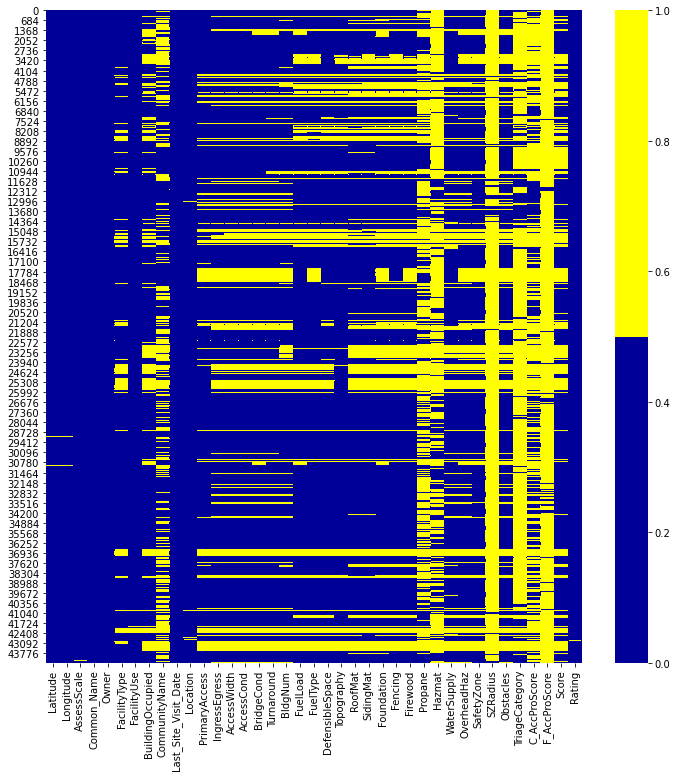

In [ ]:
# %% Missing Data Heatmap
plt.figure(figsize=(12,12))
cols = df.columns[:40] # first 40 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
# %% # if it's a larger dataset and the visualization takes too long can do this.
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

Latitude - 0%
Longitude - 0%
AssessScale - 0%
Common_Name - 0%
Owner - 0%
FacilityType - 12%
FacilityUse - 1%
BuildingOccupied - 21%
CommunityName - 40%
Last_Site_Visit_Date - 0%
Location - 0%
PrimaryAccess - 14%
IngressEgress - 20%
AccessWidth - 20%
AccessCond - 20%
BridgeCond - 22%
Turnaround - 22%
BldgNum - 24%
FuelLoad - 20%
FuelType - 20%
DefensibleSpace - 18%
Topography - 15%
RoofMat - 23%
SidingMat - 23%
Foundation - 29%
Fencing - 26%
Firewood - 27%
Propane - 65%
Hazmat - 72%
WaterSupply - 23%
OverheadHaz - 27%
SafetyZone - 24%
SZRadius - 95%
Obstacles - 27%
TriageCategory - 82%
C_AccProScore - 57%
F_AccProScore - 96%
Score - 32%
Rating - 0%


In [ ]:
print(df.isna().sum())

Latitude                   98
Longitude                  98
AssessScale                55
Common_Name                27
Owner                      51
FacilityType             5468
FacilityUse               567
BuildingOccupied         9446
CommunityName           17925
Last_Site_Visit_Date        0
Location                  187
PrimaryAccess            6249
IngressEgress            8867
AccessWidth              8980
AccessCond               8983
BridgeCond               9629
Turnaround               9596
BldgNum                 10556
FuelLoad                 8775
FuelType                 9068
DefensibleSpace          8022
Topography               6509
RoofMat                 10100
SidingMat               10221
Foundation              12674
Fencing                 11324
Firewood                12034
Propane                 28894
Hazmat                  31849
WaterSupply             10044
OverheadHaz             11801
SafetyZone              10809
SZRadius                42313
Obstacles 

In [ ]:
#Import Library
import folium
import xlrd
#assert xlrd.__version__>= '1'
from folium.plugins import MarkerCluster

import pandas as pd
import numpy as np

In [ ]:
df.dropna(subset = ["Latitude", "Longitude", "Score", "Rating"], inplace=True)
df.shape

(30105, 39)

In [ ]:
latitude = df['Latitude']
longitude = df['Longitude']
score = df['Score']
# Create base map
map = folium.Map(location=[32.99, -111.536 ], zoom_start = 6, control_scale=True)

In [ ]:
df['Rating'].count()

30105

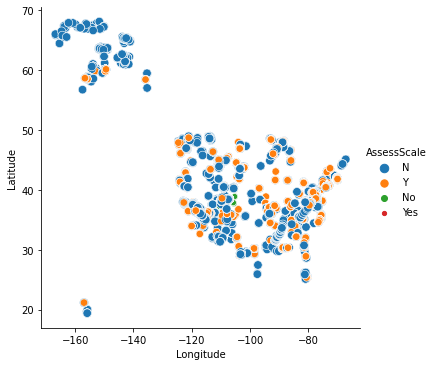

In [ ]:
sns.relplot(x="Longitude", y="Latitude", hue="AssessScale", size="AssessScale", data=df);

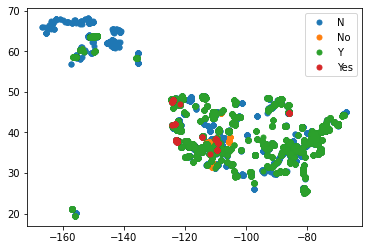

In [ ]:
import matplotlib.pyplot as plt

groups = df.groupby('AssessScale')
for name, group in groups:
    plt.plot(group.Longitude, group.Latitude, marker='o', linestyle='', markersize=5, label=name)

plt.legend()

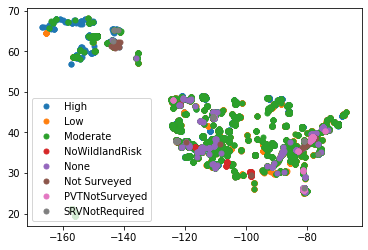

In [ ]:
import matplotlib.pyplot as plt

groups = df.groupby('Rating')
for name, group in groups:
    plt.plot(group.Longitude, group.Latitude, marker='o', linestyle='', markersize=5, label=name)

plt.legend()

In [ ]:
!pip install chart-studio

In [ ]:
import plotly
# import chart_studio.plotly as py
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()

In [ ]:
import pandas as pd
coords = pd.concat([df['Latitude'], df['Longitude'], df['Score']], axis=1)
coords = coords.sample(frac=0.1, replace=True)
cases = []
colors = ['rgb(239,243,255)','rgb(189,215,231)','rgb(107,174,214)','rgb(33,113,181)']


In [ ]:
from plotly.offline import init_notebook_mode, iplot

In [ ]:
# %% Checking the data type
print(df.dtypes)

Latitude                float64
Longitude               float64
AssessScale              object
Common_Name              object
Owner                    object
FacilityType             object
FacilityUse              object
BuildingOccupied         object
CommunityName            object
Last_Site_Visit_Date     object
Location                 object
PrimaryAccess            object
IngressEgress           float64
AccessWidth             float64
AccessCond              float64
BridgeCond              float64
Turnaround              float64
BldgNum                 float64
FuelLoad                float64
FuelType                float64
DefensibleSpace         float64
Topography              float64
RoofMat                 float64
SidingMat               float64
Foundation              float64
Fencing                 float64
Firewood                float64
Propane                 float64
Hazmat                   object
WaterSupply             float64
OverheadHaz             float64
SafetyZo

In [ ]:
df.describe().shape ## shape of dataset (30105, 39)
df.describe()

Latitude     Longitude  ...  F_AccProScore         Score
count  30105.000000  30105.000000  ...    1812.000000  30105.000000
mean      40.300291   -102.061106  ...       8.779249     55.665537
std        7.201867     20.943908  ...      14.051646     21.439550
min       19.417794   -166.821219  ...       0.000000      0.000000
25%       36.198764   -116.158500  ...       0.000000     41.000000
50%       38.592756   -109.764278  ...       0.000000     56.000000
75%       43.783041    -81.265018  ...      16.000000     70.000000
max       68.142401    -67.134027  ...      86.000000    132.000000

[8 rows x 26 columns]

In [ ]:
df.describe(include=np.object)

AssessScale Common_Name  Owner  ...        Hazmat TriageCategory Rating
count        30075       30098  30090  ...         12102           7922  30105
unique           4       26887     13  ...          2276              4      8
top              Y     Unknown    NPS  ...  None visible       PrepHold   High
freq         20433         460  27017  ...          1688           3778  10594

[4 rows x 13 columns]

In [ ]:
df.describe(include=np.object).shape

(4, 13)

In [ ]:
df.drop(df.columns[3],axis=1,inplace=True)
df.drop(df.columns[8],axis=1,inplace=True)
df.describe(include=np.object)

AssessScale  Owner FacilityType  ...        Hazmat TriageCategory Rating
count        30075  30090        30055  ...         12102           7922  30105
unique           4     13           19  ...          2276              4      8
top              Y    NPS     Building  ...  None visible       PrepHold   High
freq         20433  27017        24040  ...          1688           3778  10594

[4 rows x 11 columns]

In [ ]:
df.loc[df['AssessScale'] == "Y", "AssessScale"] = "Yes"
df.loc[df['AssessScale'] == "N", "AssessScale"] = "No"
print(df['AssessScale'].value_counts())

Yes    20882
No      9193
Name: AssessScale, dtype: int64


In [ ]:
print(df['Owner'].value_counts())

NPS            27017
Private         2034
Unknown          799
City              91
State             64
Tribal            17
DOD               17
USFS              17
BOR               15
County             6
USFWS              6
OtherFedGov        4
BIA                3
Name: Owner, dtype: int64


In [ ]:
print(df['FacilityType'].value_counts())

Building               24040
Toilet                  2540
Shade                    809
Other                    665
CulturalResource         531
Utility                  478
None Found               282
Removed                  163
Sign                     111
CommSite                 105
Administrative            74
Fence                     62
Utility Site              58
RAWS                      46
PropaneTank               40
SurveyNotRequired         28
PrivateNoSurvey           17
Mine                       5
Communications Site        1
Name: FacilityType, dtype: int64


In [ ]:
df.loc[df['FacilityType'] == "CommSite", "FacilityType"] = "Communications_Site"
df.loc[df['FacilityType'] == "Communications Site", "FacilityType"] = "Communications_Site"
df.loc[df['FacilityType'] == "Mine", "FacilityType"] = "PrivateNoSurvey"
df.loc[df['FacilityType'] == "Utility", "FacilityType"] = "Utility_Site"
df.loc[df['FacilityType'] == "Utility Site", "FacilityType"] = "Utility_Site"
df.loc[df['FacilityType'] == "Removed", "FacilityType"] = "Other"
df.loc[df['FacilityType'] == "None Found", "FacilityType"] = "Other"
print(df['FacilityType'].value_counts())

Building               24040
Toilet                  2540
Other                   1110
Shade                    809
Utility_Site             536
CulturalResource         531
Sign                     111
Communications_Site      106
Administrative            74
Fence                     62
RAWS                      46
PropaneTank               40
SurveyNotRequired         28
PrivateNoSurvey           22
Name: FacilityType, dtype: int64


In [ ]:
df.loc[df['FacilityUse'] == "Administrative", "FacilityUse"] = "Admin"
df.loc[df['FacilityUse'] == "Unknown", "FacilityUse"] = "Other"
df.loc[df['FacilityUse'] == "NoKnown", "FacilityUse"] = "Other"
df.loc[df['FacilityUse'] == "NotApplicable", "FacilityUse"] = "Other"

print(df['FacilityUse'].value_counts())

Admin         10417
Public         7432
Residence      4536
Other          3612
Private        1780
Lodging        1661
Concession      464
Permittee       170
Name: FacilityUse, dtype: int64


In [ ]:
print(df['BuildingOccupied'].value_counts())
df.loc[df['BuildingOccupied'] == "Y", "BuildingOccupied"] = "Yes"
df.loc[df['BuildingOccupied'] == "N", "BuildingOccupied"] = "No"
print(df['BuildingOccupied'].value_counts())

N      15839
Y      10935
Yes     1625
No       781
Name: BuildingOccupied, dtype: int64
No     16620
Yes    12560
Name: BuildingOccupied, dtype: int64


In [ ]:
print(df['CommunityName'].value_counts())

Curry Village                                     609
Headquarters                                      268
Yosemite Village                                  245
park circle residential area                      234
Upper Mammoth                                     183
                                                 ... 
Horn Creek                                          1
Riselo / Witt / Smith                               1
none                                                1
PROBLEM WITH DUPLICATE RECORD (CHECK LOCATION)      1
FBF Natural Resource Office (Quarters 15)           1
Name: CommunityName, Length: 1197, dtype: int64


In [ ]:
print(df['Location'].value_counts())

Yosemite Valley               1154
South Rim Village             1013
Wellfleet                      507
Truro                          497
BLRI                           428
                              ... 
CEMETARY                         1
Doyles River Cabin               1
GUIS                             1
Cresent River                    1
Exit Glacier Nature Center       1
Name: Location, Length: 1211, dtype: int64


In [ ]:
print(df['PrimaryAccess'].value_counts())

Road     26675
Boat       992
Air        817
Foot       641
ATV        146
Other       39
Name: PrimaryAccess, dtype: int64


In [ ]:
print(df['Hazmat'].value_counts())

None visible                                                                                                                                                                1688
None Visible                                                                                                                                                                1214
Propane                                                                                                                                                                      790
none                                                                                                                                                                         724
None                                                                                                                                                                         599
                                                                                                                   

In [ ]:
print(df['TriageCategory'].value_counts())

PrepHold         3778
PrepLeave        3444
Standalone        587
Nondefensible     113
Name: TriageCategory, dtype: int64


In [ ]:
df.loc[df['Rating'] == "PVTNotSurveyed", "Rating"] = "Not_Surveyed"
df.loc[df['Rating'] == "None", "Rating"] = "Not_Surveyed"
df.loc[df['Rating'] == "Not Surveyed", "Rating"] = "Not_Surveyed"
df.loc[df['Rating'] == "SRVNotRequired", "Rating"] = "NoWildlandRisk"
print(df['Rating'].value_counts())

High              10594
Moderate           9823
Low                8639
Not_Surveyed        822
NoWildlandRisk      227
Name: Rating, dtype: int64


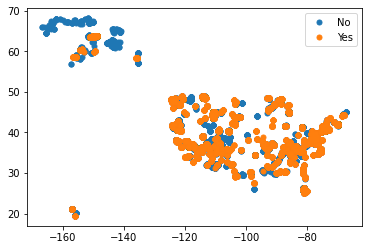

In [ ]:
import matplotlib.pyplot as plt

groups = df.groupby('AssessScale')
for name, group in groups:
    plt.plot(group.Longitude, group.Latitude, marker='o', linestyle='', markersize=5, label=name)

plt.legend()

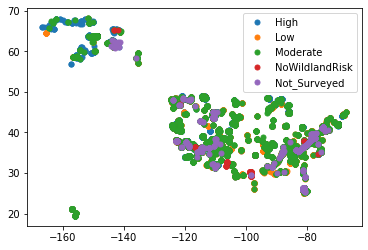

In [ ]:
import matplotlib.pyplot as plt

groups = df.groupby('Rating')
for name, group in groups:
    plt.plot(group.Longitude, group.Latitude, marker='o', linestyle='', markersize=5, label=name)

plt.legend()

In [ ]:
# %% Checking the data type
#print(df.dtypes)
print(df.shape)
df.drop(df.columns[26],axis=1,inplace=True)
df.drop(df.columns[7],axis=1,inplace=True)
df.drop(df.columns[8],axis=1,inplace=True)

print(df.shape)

(30105, 37)
(30105, 34)


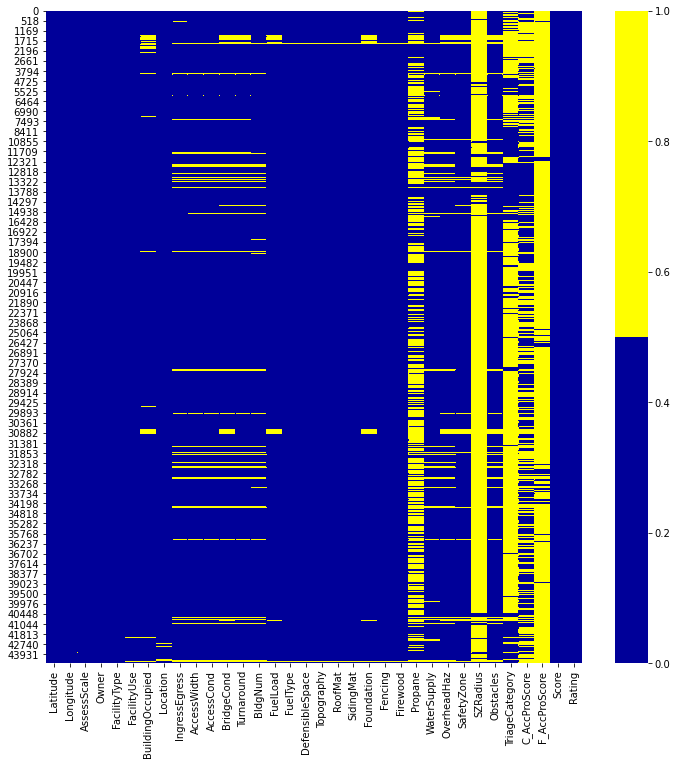

In [ ]:
# %% Missing Data Heatmap
plt.figure(figsize=(12,12))
cols = df.columns[:40] # first 40 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [ ]:
# %% # 
# impute the missing values and create the missing value indicator variables for each non-numeric column.
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

for col in non_numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))

        
        top = df[col].describe()['top'] # impute with the most frequent value.
        df[col] = df[col].fillna(top)

imputing missing values for: AssessScale
imputing missing values for: Owner
imputing missing values for: FacilityType
imputing missing values for: FacilityUse
imputing missing values for: BuildingOccupied
imputing missing values for: Location
imputing missing values for: TriageCategory


In [ ]:
 # %% Converting all the categorical variables into numerical ones in the dataset
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

for i in range(0,df.shape[1]):
    if df.dtypes[i]=='object':
        df[df.columns[i]] = le.fit_transform(df[df.columns[i]])
print(df.dtypes)

df.head(5)

Latitude            float64
Longitude           float64
AssessScale           int64
Owner                 int64
FacilityType          int64
FacilityUse           int64
BuildingOccupied      int64
Location              int64
IngressEgress       float64
AccessWidth         float64
AccessCond          float64
BridgeCond          float64
Turnaround          float64
BldgNum             float64
FuelLoad            float64
FuelType            float64
DefensibleSpace     float64
Topography          float64
RoofMat             float64
SidingMat           float64
Foundation          float64
Fencing             float64
Firewood            float64
Propane             float64
WaterSupply         float64
OverheadHaz         float64
SafetyZone          float64
SZRadius            float64
Obstacles           float64
TriageCategory        int64
C_AccProScore       float64
F_AccProScore       float64
Score               float64
Rating                int64
dtype: object


Latitude   Longitude  AssessScale  ...  F_AccProScore  Score  Rating
0  32.183823 -110.592244            0  ...            NaN   89.0       0
2  32.994448 -111.537037            1  ...            NaN   47.0       2
3  32.995553 -111.536253            1  ...            NaN   15.0       1
4  32.995787 -111.536455            1  ...            NaN   15.0       1
5  32.994172 -111.536518            1  ...            NaN   21.0       1

[5 rows x 34 columns]

In [ ]:
df.shape

(30105, 34)

In [ ]:
# %% # impute the missing values and create the missing value indicator variables for each numeric column.
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values

for col in numeric_cols:
    missing = df[col].isnull()
    num_missing = np.sum(missing)
    
    if num_missing > 0:  # only do the imputation for the columns that have missing values.
        print('imputing missing values for: {}'.format(col))
     
        med = df[col].median()
        df[col] = df[col].fillna(med)



imputing missing values for: IngressEgress
imputing missing values for: AccessWidth
imputing missing values for: AccessCond
imputing missing values for: BridgeCond
imputing missing values for: Turnaround
imputing missing values for: BldgNum
imputing missing values for: FuelLoad
imputing missing values for: FuelType
imputing missing values for: DefensibleSpace
imputing missing values for: Topography
imputing missing values for: RoofMat
imputing missing values for: SidingMat
imputing missing values for: Foundation
imputing missing values for: Fencing
imputing missing values for: Firewood
imputing missing values for: Propane
imputing missing values for: WaterSupply
imputing missing values for: OverheadHaz
imputing missing values for: SafetyZone
imputing missing values for: SZRadius
imputing missing values for: Obstacles
imputing missing values for: C_AccProScore
imputing missing values for: F_AccProScore


In [ ]:

# %% Checking the data type
print(df.dtypes)
df.shape

Latitude            float64
Longitude           float64
AssessScale           int64
Owner                 int64
FacilityType          int64
FacilityUse           int64
BuildingOccupied      int64
Location              int64
IngressEgress       float64
AccessWidth         float64
AccessCond          float64
BridgeCond          float64
Turnaround          float64
BldgNum             float64
FuelLoad            float64
FuelType            float64
DefensibleSpace     float64
Topography          float64
RoofMat             float64
SidingMat           float64
Foundation          float64
Fencing             float64
Firewood            float64
Propane             float64
WaterSupply         float64
OverheadHaz         float64
SafetyZone          float64
SZRadius            float64
Obstacles           float64
TriageCategory        int64
C_AccProScore       float64
F_AccProScore       float64
Score               float64
Rating                int64
dtype: object


(30105, 34)

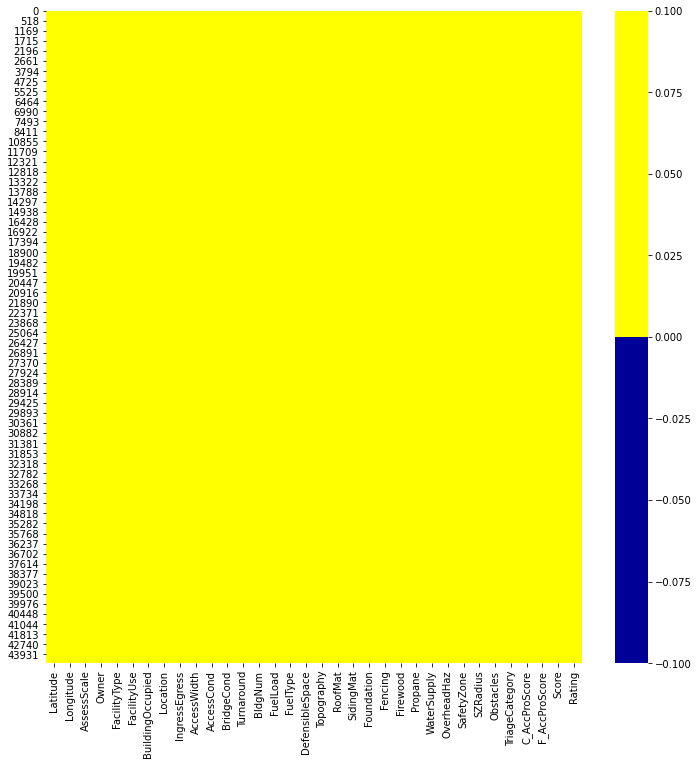

In [ ]:
# %% Missing Data Heatmap
plt.figure(figsize=(12,12))
cols = df.columns[:40] # first 40 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

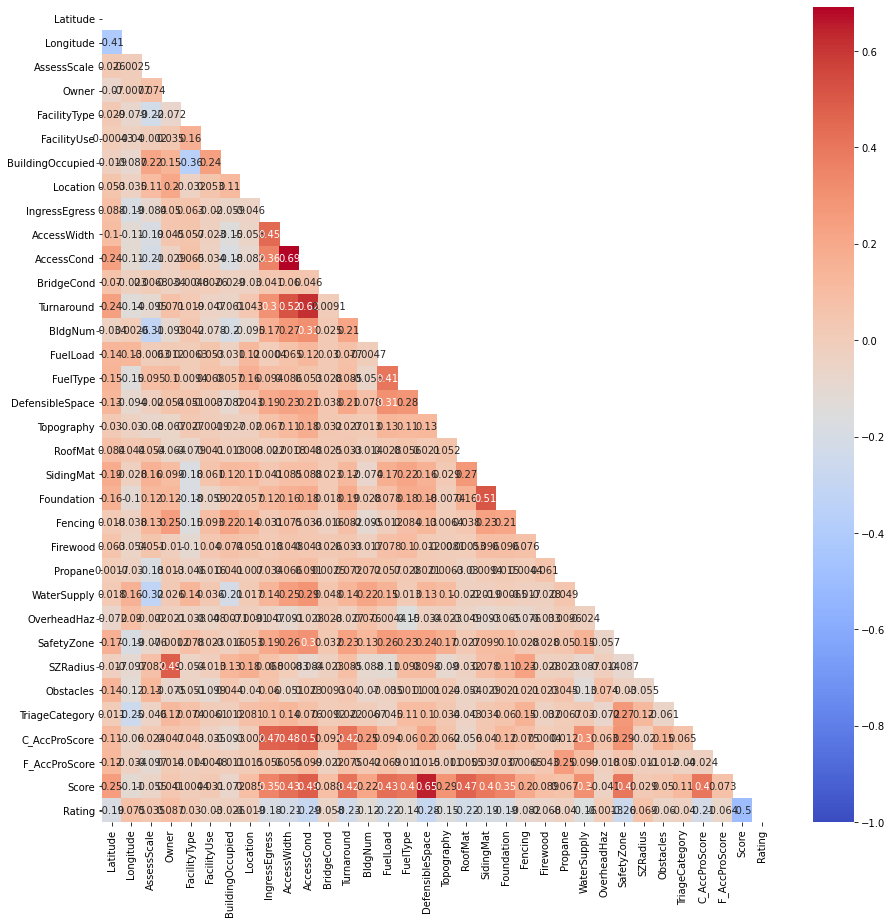

In [ ]:
# %% # # %% # %% # Visualizing the correlation matrix and Heatmap
plt.figure(figsize=(15,15))
mask = np.zeros_like(df[cols].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df[cols].corr(), 
            vmin = -1,
            cmap='coolwarm',
            annot=False,
            mask=mask)
# plt.savefig('corr-matrix.png')
plt.show()

In [ ]:
# %% ### Model Lasso regression
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, df.iloc[:, :32], df.iloc[:, 33],
                                   scoring="neg_mean_squared_error", cv = 10))
    return(rmse)

model_lasso = LassoCV(alphas = [0.0005, 0.001, 0.1, 1]).fit( df.iloc[:, :32], df.iloc[:, 33])
print(rmse_cv(model_lasso).mean())

0.8575574015894191


In [ ]:
# %% ### Model Lasso regression (l1):: Select features
coef = pd.Series(model_lasso.coef_, index = df.columns[:32])
print(coef.head)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " 
      +  str(sum(coef == 0)) + " variables")

<bound method NDFrame.head of Latitude           -0.006062
Longitude           0.000394
AssessScale         0.000000
Owner               0.075228
FacilityType        0.001685
FacilityUse        -0.003568
BuildingOccupied   -0.173217
Location           -0.000021
IngressEgress      -0.022806
AccessWidth         0.016191
AccessCond         -0.037131
BridgeCond         -0.041504
Turnaround         -0.042329
BldgNum            -0.022061
FuelLoad           -0.025315
FuelType            0.008885
DefensibleSpace    -0.019197
Topography         -0.020394
RoofMat            -0.018271
SidingMat          -0.017664
Foundation         -0.052814
Fencing            -0.020175
Firewood           -0.040282
Propane             0.000000
WaterSupply        -0.022636
OverheadHaz        -0.030997
SafetyZone         -0.077590
SZRadius            0.000370
Obstacles          -0.041695
TriageCategory     -0.003275
C_AccProScore      -0.002325
F_AccProScore      -0.004315
dtype: float64>
Lasso picked 30 variables 

Text(0.5, 1.0, 'Coefficients in the Lasso Model')

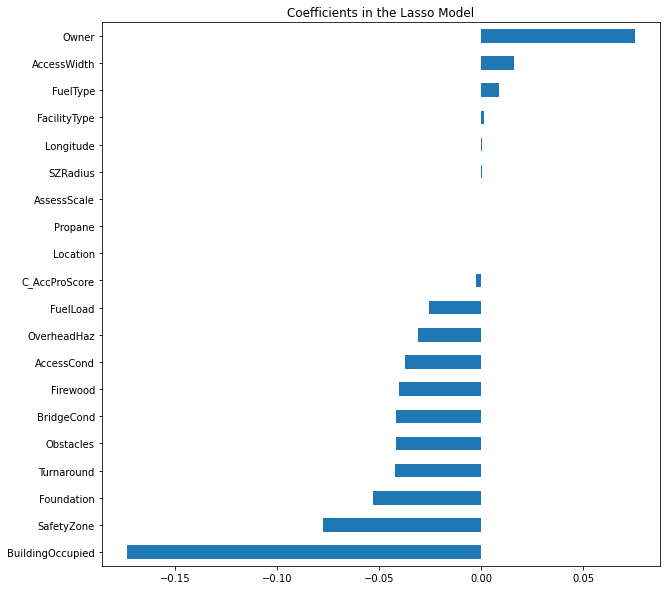

In [ ]:
# %% Print feature selection

imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

F_AccProScore       0.001762
BridgeCond          0.003160
Propane             0.003266
TriageCategory      0.005668
SZRadius            0.005912
OverheadHaz         0.006007
Firewood            0.006771
Obstacles           0.007631
Owner               0.008788
BuildingOccupied    0.008960
AssessScale         0.009001
BldgNum             0.013696
FacilityType        0.013771
Fencing             0.017468
FacilityUse         0.020822
IngressEgress       0.022159
SafetyZone          0.023723
Foundation          0.024602
Turnaround          0.024928
Topography          0.026351
WaterSupply         0.032688
FuelType            0.033463
AccessWidth         0.033989
SidingMat           0.046110
FuelLoad            0.047599
Location            0.047672
AccessCond          0.048303
C_AccProScore       0.058879
Latitude            0.070863
Longitude           0.071593
RoofMat             0.099353
DefensibleSpace     0.155042
dtype: float64


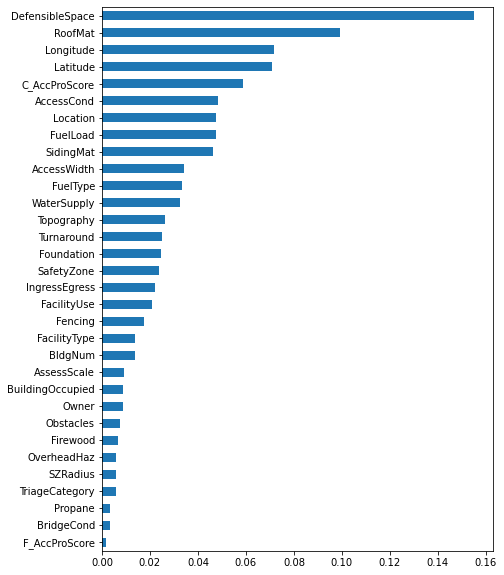

In [ ]:
# %%% ### # Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 1111
test_scores, train_scores = [], []
for i in [1,3,5,7,10,20,25,30,60,80]:
      rfc = RandomForestClassifier(n_estimators=i, random_state=1111)
      rfc=rfc.fit(df.iloc[:, :32], df.iloc[:, 33]) # print(rfc)
# Create a pd.Series of features importances
importances_rf = pd.Series(rfc.feature_importances_, index = df.columns[:32])
# Sort importances_rf
sorted_importances_rf = importances_rf.sort_values()
print(sorted_importances_rf)
# Make a horizontal bar plot
plt.figure(figsize=(7,10))
sorted_importances_rf.plot(kind='barh'); 

In [ ]:

# %% Cumilative feature improtance from RFC
print(sorted_importances_rf.shape)
sorted_importances_rf_1 = importances_rf.sort_values(ascending=False)
df_1=sorted_importances_rf_1.to_frame()

# # List of features sorted from most to least important
# sorted_importances = importances_rf.reset_index(drop=True, inplace=True)
df_1 = df_1.rename_axis('Index')
print(df_1)
df_1['id'] = list(df_1.index)
sorted_features = df_1['id']
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances_rf_1)


(32,)
                         0
Index                     
DefensibleSpace   0.155042
RoofMat           0.099353
Longitude         0.071593
Latitude          0.070863
C_AccProScore     0.058879
AccessCond        0.048303
Location          0.047672
FuelLoad          0.047599
SidingMat         0.046110
AccessWidth       0.033989
FuelType          0.033463
WaterSupply       0.032688
Topography        0.026351
Turnaround        0.024928
Foundation        0.024602
SafetyZone        0.023723
IngressEgress     0.022159
FacilityUse       0.020822
Fencing           0.017468
FacilityType      0.013771
BldgNum           0.013696
AssessScale       0.009001
BuildingOccupied  0.008960
Owner             0.008788
Obstacles         0.007631
Firewood          0.006771
OverheadHaz       0.006007
SZRadius          0.005912
TriageCategory    0.005668
Propane           0.003266
BridgeCond        0.003160
F_AccProScore     0.001762


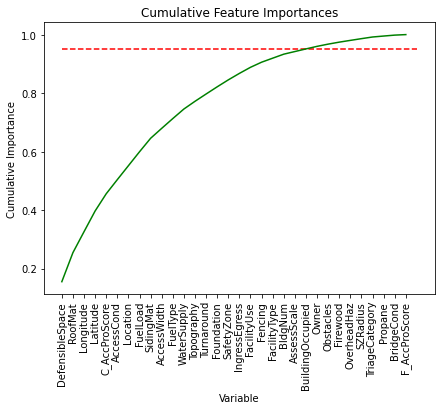

In [ ]:
# Make a line graph
# list of x locations for plotting
x_values = list(range(len(sorted_importances_rf_1)))
plt.figure(figsize=(7,5))
plt.plot(x_values, cumulative_importances, 'g-')


# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances_rf_1), 
            color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); 
plt.ylabel('Cumulative Importance'); 
plt.title('Cumulative Feature Importances');

In [ ]:
X_1 = df.drop(['Score', 'Rating'], axis = 1)
y = df['Rating']

In [ ]:
# %% # Normalization of the feature variables

def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

X_1=normalize(X_1)
X_1.head()

Latitude  Longitude  ...  C_AccProScore  F_AccProScore
0  0.262004   0.564054  ...       0.333333            0.0
2  0.278641   0.554577  ...       0.177778            0.0
3  0.278663   0.554584  ...       0.177778            0.0
4  0.278668   0.554582  ...       0.177778            0.0
5  0.278635   0.554582  ...       0.177778            0.0

[5 rows x 32 columns]

In [ ]:
# %% # split data into X and y
SEED=1234
random.seed(SEED)
X_1_train, X_1_test, y_train, y_test = train_test_split(X_1, y, train_size=0.75, random_state=1)


In [ ]:
print(df['Rating'].value_counts())

0    10594
2     9823
1     8639
4      822
3      227
Name: Rating, dtype: int64


** Disclaimer **

Few of the ML algorithms may take little long to execute !! 

// All the cells are executed already for visualization //

In [ ]:
# %%
test_scores, train_scores = [], []
for i in [1,5,10,20,60,120, 160, 320, 400, 450, 500]:
      rfc = RandomForestClassifier(n_estimators=i, random_state=1111, max_depth=16, max_features="sqrt")
      rfc=rfc.fit(X_1_train, y_train) # print(rfc)
      train_predictions = rfc.predict(X_1_train)
      test_predictions = rfc.predict(X_1_test)
      train_scores.append(round(accuracy_score(y_train, train_predictions), 2))
      test_scores.append(round(accuracy_score(y_test, test_predictions), 2))

# Print the train and test scores.
print("The maximum training score from RF is: {}".format(max(train_scores)))
print("The maximum testing scores from RF is: {}".format(max(test_scores)))
# %%



The maximum training score from RF is: 0.99
The maximum testing scores from RF is: 0.91


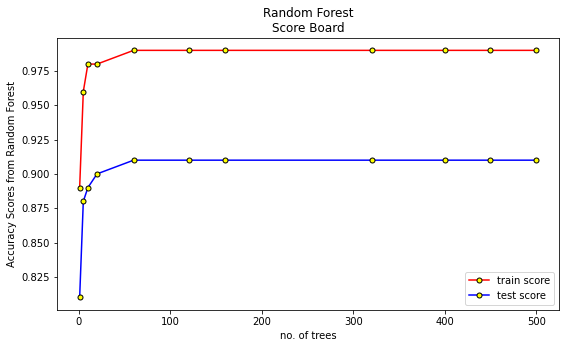

In [ ]:
z = [1,5,10,20,60,120, 160, 320, 400, 450, 500]
plt.figure(figsize=(9,5))
plt.plot(z, train_scores,  'r',  marker='o', markersize=5, markerfacecolor='yellow', markeredgewidth=1, markeredgecolor='k')
plt.plot(z, test_scores, 'b', marker='o', markersize=5, markerfacecolor='yellow', markeredgewidth=1, markeredgecolor='k')
plt.legend(['train score', 'test score'], loc='lower right')
plt.xlabel('no. of trees')
plt.ylabel('Accuracy Scores from Random Forest')
plt.title('Random Forest\nScore Board')
plt.show()

In [ ]:
print(classification_report(y_test, test_predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2584
           1       0.93      0.93      0.93      2205
           2       0.87      0.89      0.88      2458
           3       1.00      0.65      0.79        65
           4       0.99      0.78      0.87       215

    accuracy                           0.91      7527
   macro avg       0.95      0.84      0.88      7527
weighted avg       0.91      0.91      0.91      7527



In [ ]:
confusion_matrix(y_test, test_predictions)

array([[2439,    3,  141,    0,    1],
       [   5, 2050,  150,    0,    0],
       [ 151,  128, 2179,    0,    0],
       [   5,   11,    7,   42,    0],
       [   8,   24,   16,    0,  167]])

In [ ]:
from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

ensemble_clfs = [
    ("RandomForestClassifier, max_features='sqrt'",
        RandomForestClassifier(warm_start=True, max_features="sqrt",
                               oob_score=True,
                               random_state=SEED)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=SEED)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=SEED))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)



In [ ]:
ensemble_clfs

[("RandomForestClassifier, max_features='sqrt'",
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='sqrt',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, n_estimators=100,
                         n_jobs=None, oob_score=True, random_state=1234,
                         verbose=0, warm_start=True)),
 ("RandomForestClassifier, max_features='log2'",
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_features='log2',
                         max_leaf_nodes=None, max_samples=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1

In [ ]:
# Range of `n_estimators` values to explore.
min_estimators = 5
max_estimators = 200

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_1_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))



/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:523: UserWarning:

Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/_forest.py:528: RuntimeWarning:

invalid value encountered in tr

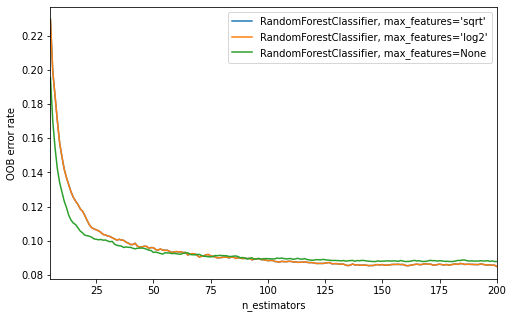

In [ ]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
plt.figure(figsize=(8,5))
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)


plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.show()

In [ ]:
# %% ### Extreme Gradient Boosting with XGBoost ###
random.seed(SEED)
# Instantiating the classifier and fitting it 
xgb_clf = xgb.XGBClassifier(objective ='multi:softprob', colsample_bytree = 0.3, 
                            learning_rate = 0.5, max_depth = 16, alpha = 10, n_estimators = 500)
xgb_clf.fit(X_1_train, y_train)
# Applying classifier on train (seen) set
predictions_1 = xgb_clf.predict(X_1_train)
# Applying classifier on test (unseen) set
predictions_2 = xgb_clf.predict(X_1_test)


# print accuracy
print("XGB Accuracy test: {:.2f}".format(metrics.accuracy_score(y_test, predictions_2)))
print("XGB Accuracy train: {:.2f}".format(metrics.accuracy_score(y_train, predictions_1)))


XGB Accuracy test: 0.93
XGB Accuracy train: 1.00


In [ ]:
print(classification_report(y_test, predictions_2))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      2584
           1       0.94      0.95      0.94      2205
           2       0.90      0.90      0.90      2458
           3       0.95      0.82      0.88        65
           4       0.97      0.91      0.94       215

    accuracy                           0.93      7527
   macro avg       0.94      0.90      0.92      7527
weighted avg       0.93      0.93      0.93      7527



In [ ]:
confusion_matrix(y_test, predictions_2)

array([[2459,    2,  121,    0,    2],
       [   2, 2085,  113,    2,    3],
       [ 130,  116, 2211,    0,    1],
       [   4,    5,    2,   53,    1],
       [   3,    7,    8,    1,  196]])

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y_train)
# grid search
model_xgb = XGBClassifier()
learning_rate = [0.001, 0.01, 0.1, 0.4, 0.6, 1]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=SEED)
grid_search = GridSearchCV(model_xgb, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X_1_train, label_encoded_y)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
	print("%f (%f) with: %r" % (mean, stdev, param))


Best: -0.221351 using {'learning_rate': 1}
-1.509660 (0.000752) with: {'learning_rate': 0.001}
-1.029463 (0.004977) with: {'learning_rate': 0.01}
-0.429662 (0.009111) with: {'learning_rate': 0.1}
-0.272049 (0.009616) with: {'learning_rate': 0.4}
-0.244185 (0.010740) with: {'learning_rate': 0.6}
-0.221351 (0.012758) with: {'learning_rate': 1}


In [ ]:
label_encoded_y = LabelEncoder().fit_transform(y_train)
label_encoded_y

array([1, 3, 2, ..., 2, 2, 0])

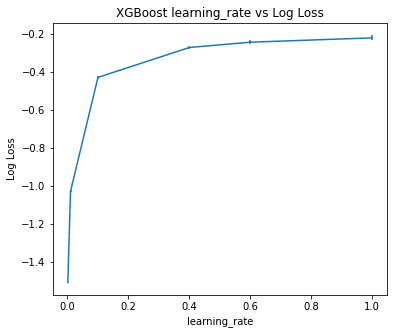

In [ ]:
# plot
plt.figure(figsize=(6,5))
plt.errorbar(learning_rate, means, yerr=stds)
plt.title("XGBoost learning_rate vs Log Loss")
plt.xlabel('learning_rate')
plt.ylabel('Log Loss')
plt.show()

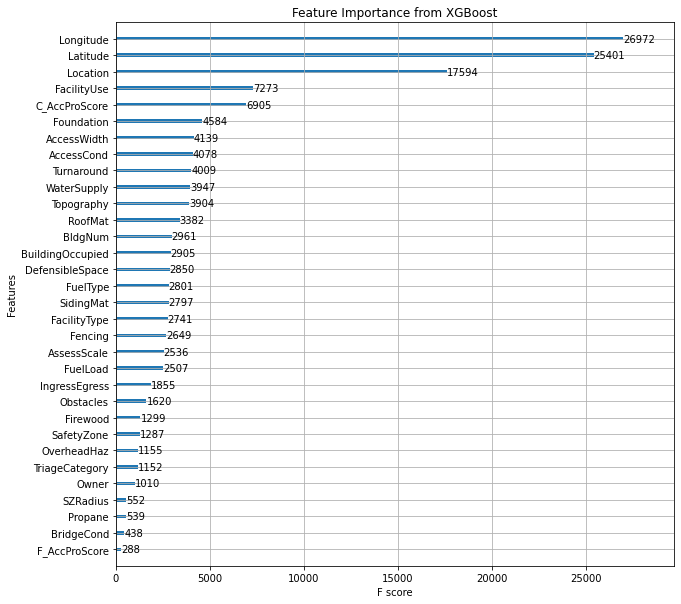

In [ ]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [7, 14]
plt.title("Feature Importance from XGBoost")
plt.show()

In [ ]:
# %% ### DecisionTreeClassifier ###
random.seed(SEED)
from sklearn.tree import DecisionTreeClassifier
# Xdt_train, Xdt_test, ydt_train, ydt_test = train_test_split(X_1, y, train_size=0.8, random_state=1)
model = DecisionTreeClassifier(max_depth=16, random_state=1)

# Fit model to the training set
clf=model.fit(X_1_train, y_train)

# Compute y_pred
ydt_predict_train = model.predict(X_1_train)
ydt_predict_test = model.predict(X_1_test)

# print accuracy
print("DT_Accuracy test: {:.2f}".format(metrics.accuracy_score(y_test, ydt_predict_test)))
print("DT_Accuracy train: {:.2f}".format(metrics.accuracy_score(y_train, ydt_predict_train)))


DT_Accuracy test: 0.87
DT_Accuracy train: 0.98


In [ ]:
print(classification_report(y_test, ydt_predict_test))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91      2584
           1       0.89      0.90      0.89      2205
           2       0.82      0.82      0.82      2458
           3       0.78      0.71      0.74        65
           4       0.83      0.76      0.80       215

    accuracy                           0.87      7527
   macro avg       0.85      0.82      0.83      7527
weighted avg       0.87      0.87      0.87      7527



In [ ]:
confusion_matrix(y_test, ydt_predict_test)

array([[2345,   19,  209,    2,    9],
       [   9, 1984,  195,    6,   11],
       [ 217,  201, 2023,    5,   12],
       [   4,    9,    5,   46,    1],
       [   7,   20,   24,    0,  164]])

In [ ]:
# %% # Implement knn classifier #####

# %% # Calculating error for K values between 1 and 25.

error , error_tr = [], []

# z = [1,3,5,7, 9, 11, 13, 15]
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_1_train, y_train)
    pred_i = knn.predict(X_1_test)
    pred_i_tr = knn.predict(X_1_train)
    error.append(np.mean(pred_i != y_test)*100)
    error_tr.append(np.mean(pred_i_tr != y_train)*100)


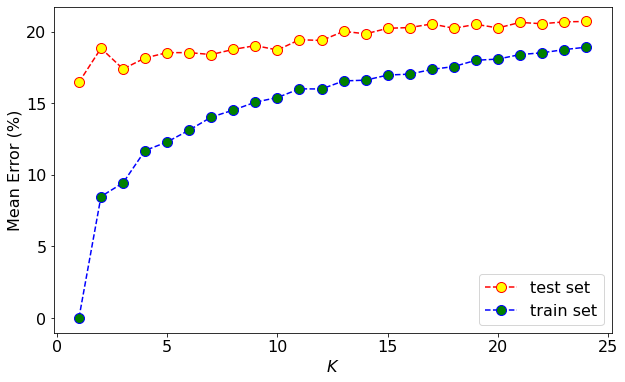

In [ ]:
### plotting KNN accuraces for train and test ####
plt.figure(figsize=(10, 6))
plt.plot(range(1, 25), error,  color='red', linestyle='dashed', marker='o',
         markerfacecolor='yellow', markersize=10)
plt.plot(range(1, 25), error_tr,  color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=10)
#plt.title('Error Rate in K Value', fontsize=16)
plt.xlabel(r'$K$', fontsize=16)
plt.ylabel('Mean Error (%)', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['test set', 'train set'], loc='best', fontsize=16)


In [ ]:
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=1)

#Train the model using the training sets
knn.fit(X_1_train, y_train)
#Predict the response for rain dataset
yknn_pred_train = knn.predict(X_1_train)
#Predict the response for test dataset
yknn_pred_test = knn.predict(X_1_test)

# print accuracy
print("KNN_Accuracy test: {:.2f}".format(metrics.accuracy_score(y_test, yknn_pred_test)))
print("KNN_Accuracy train: {:.2f}".format(metrics.accuracy_score(y_train, yknn_pred_train)))


KNN_Accuracy test: 0.84
KNN_Accuracy train: 1.00


In [ ]:
print(classification_report(y_test, yknn_pred_test))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      2584
           1       0.84      0.87      0.86      2205
           2       0.78      0.76      0.77      2458
           3       0.71      0.57      0.63        65
           4       0.80      0.85      0.82       215

    accuracy                           0.84      7527
   macro avg       0.80      0.79      0.79      7527
weighted avg       0.83      0.84      0.83      7527



In [ ]:
confusion_matrix(y_test, yknn_pred_test)

array([[2277,   21,  271,    1,   14],
       [  14, 1918,  245,   11,   17],
       [ 268,  302, 1873,    3,   12],
       [   4,   16,    5,   37,    3],
       [  10,   17,    6,    0,  182]])

In [ ]:
# %% ################# AdaBoost Classifier ####################

# Instantiate a classification-tree 'dt'
dt = DecisionTreeClassifier(max_depth=16, random_state=SEED)
# Instantiate an AdaBoost classifier 'adab_clf'
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=300)
# Fit 'adb_clf' to the training set
adb_clf.fit(X_1_train, y_train)
# Predict the train set 
yada_pred_train = adb_clf.predict(X_1_train)
# Predict the test set 
yada_pred_test = adb_clf.predict(X_1_test)
# Predict the test set probabilities of positive class
y_pred_proba = adb_clf.predict_proba(X_1_test)[:,1]

# print accuracy
print("Adb_Accuracy test: {:.2f}".format(metrics.accuracy_score(y_test, yada_pred_test)))
print("Adb_Accuracy train: {:.2f}".format(metrics.accuracy_score(y_train, yada_pred_train)))


Adb_Accuracy test: 0.91
Adb_Accuracy train: 1.00


In [ ]:
print(classification_report(y_test, yada_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93      2584
           1       0.95      0.91      0.93      2205
           2       0.84      0.92      0.88      2458
           3       1.00      0.74      0.85        65
           4       0.98      0.87      0.92       215

    accuracy                           0.91      7527
   macro avg       0.94      0.87      0.90      7527
weighted avg       0.91      0.91      0.91      7527



In [ ]:
confusion_matrix(y_test, yada_pred_test)

array([[2355,    2,  226,    0,    1],
       [   2, 2008,  194,    0,    1],
       [ 109,   91, 2256,    0,    2],
       [   5,    9,    3,   48,    0],
       [   5,   11,   13,    0,  186]])

In [ ]:
# Instantiate a classification-tree 'dt' BaggingClassifier ###
dt1 = DecisionTreeClassifier(max_depth=16, random_state=SEED)

# Instantiate a BaggingClassifier 'bc'
bc = BaggingClassifier(base_estimator=dt1, n_estimators=500, n_jobs=-1) 
# n_jobs=-1 means that all the CPU cores are used in computation. 

# Fit 'bc' to the training set
bc.fit(X_1_train, y_train)

# Predict train set labels
ybc_pred_train = bc.predict(X_1_train)

# Predict test set labels
ybc_pred_test = bc.predict(X_1_test)

# print accuracy
print("bagclass_Accuracy test: {:.2f}".format(metrics.accuracy_score(y_test, ybc_pred_test)))
print("bagclass_Accuracy train: {:.2f}".format(metrics.accuracy_score(y_train, ybc_pred_train)))


bagclass_Accuracy test: 0.91
bagclass_Accuracy train: 0.99


In [ ]:
print(classification_report(y_test, ybc_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2584
           1       0.92      0.93      0.93      2205
           2       0.87      0.89      0.88      2458
           3       0.85      0.71      0.77        65
           4       0.97      0.78      0.86       215

    accuracy                           0.91      7527
   macro avg       0.91      0.85      0.88      7527
weighted avg       0.91      0.91      0.91      7527



In [ ]:
confusion_matrix(y_test, ybc_pred_test)

array([[2433,    5,  144,    0,    2],
       [   7, 2044,  145,    6,    3],
       [ 141,  130, 2184,    2,    1],
       [   5,   11,    3,   46,    0],
       [   5,   20,   22,    0,  168]])

In [ ]:
### fitting SVM on training set ###
from sklearn import svm, datasets
linear = svm.SVC(kernel='linear', C=1).fit(X_1_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=.5, C=1, decision_function_shape='ovo').fit(X_1_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_1_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_1_train, y_train)

In [ ]:
linear_pred = linear.predict(X_1_test)
poly_pred = poly.predict(X_1_test)
rbf_pred = rbf.predict(X_1_test)
sig_pred = sig.predict(X_1_test)



In [ ]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_1_test, y_test)
accuracy_poly = poly.score(X_1_test, y_test)
accuracy_rbf = rbf.score(X_1_test, y_test)
accuracy_sig = sig.score(X_1_test, y_test)
print('Accuracy Linear Kernel:', accuracy_lin)
print('Accuracy Polynomial Kernel:', accuracy_poly)
print('Accuracy Radial Basis Kernel:', accuracy_rbf)
print('Accuracy Sigmoid Kernel:', accuracy_sig)

Accuracy Linear Kernel: 0.868074930251096
Accuracy Polynomial Kernel: 0.9044772153580444
Accuracy Radial Basis Kernel: 0.9112528231699216
Accuracy Sigmoid Kernel: 0.2569416766307958


In [ ]:
# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
print(cm_lin)

[[2394    6  184    0    0]
 [  17 1998  183    0    7]
 [ 197  158 2097    0    6]
 [   6   47   11    0    1]
 [  37   98   35    0   45]]


In [ ]:
cm_poly = confusion_matrix(y_test, poly_pred)
print(cm_poly)


[[2418    4  161    0    1]
 [   4 2044  154    0    3]
 [ 132  139 2186    0    1]
 [   6   31    3   24    1]
 [  13   43   23    0  136]]


In [ ]:
cm_rbf = confusion_matrix(y_test, rbf_pred)
print(cm_rbf)

[[2430    2  151    0    1]
 [   5 2038  157    0    5]
 [ 144  109 2205    0    0]
 [   5   21    6   31    2]
 [  12   26   22    0  155]]


In [ ]:
cm_sig = confusion_matrix(y_test, sig_pred)
print(cm_sig)

[[1076 1222  286    0    0]
 [1382  795   26    0    2]
 [1632  767   59    0    0]
 [  44   18    3    0    0]
 [  81  126    4    0    4]]
